In [50]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Data Prep/Data to Impute/final_data.csv')

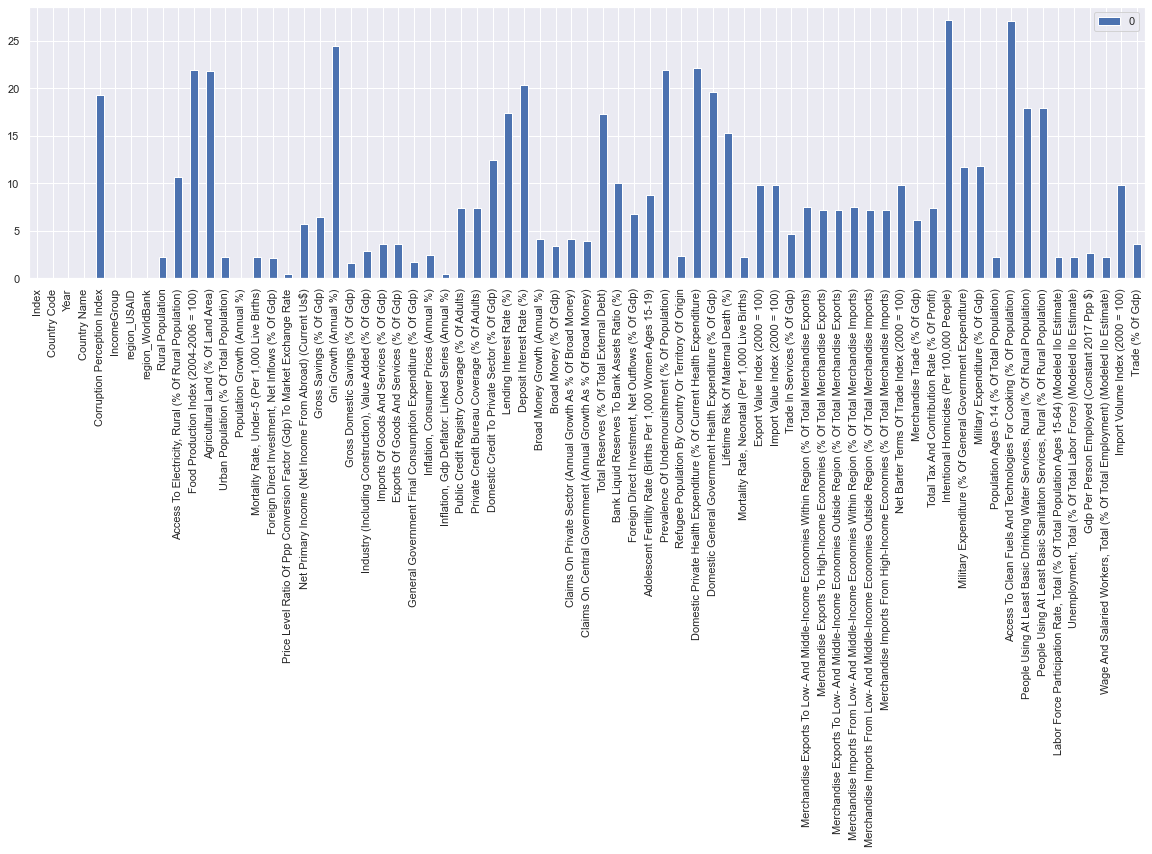

In [52]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

In [53]:
df.columns

Index(['Index', 'Country Code', 'Year', 'Country Name',
       'Corruption Perception Index', 'IncomeGroup', 'region_USAID',
       'region_WorldBank', 'Rural Population',
       'Access To Electricity, Rural (% Of Rural Population)',
       'Food Production Index (2004-2006 = 100)',
       'Agricultural Land (% Of Land Area)',
       'Urban Population (% Of Total Population)',
       'Population Growth (Annual %)',
       'Mortality Rate, Under-5 (Per 1,000 Live Births)',
       'Foreign Direct Investment, Net Inflows (% Of Gdp)',
       'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
       'Net Primary Income (Net Income From Abroad) (Current Us$)',
       'Gross Savings (% Of Gdp)', 'Gni Growth (Annual %)',
       'Gross Domestic Savings (% Of Gdp)',
       'Industry (Including Construction), Value Added (% Of Gdp)',
       'Imports Of Goods And Services (% Of Gdp)',
       'Exports Of Goods And Services (% Of Gdp)',
       'General Government Final Cons

In [54]:
#pd.DataFrame(df.isnull().sum()).to_csv('check.csv')

In [55]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Gross Domestic Savings (% Of Gdp)']])


# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].notnull()]

#test
sample_imputeUnknown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].isnull()]


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Gross Domestic Savings (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)



In [56]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

0.9994071448842426

In [57]:
#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

In [58]:
len(sample_imputeUnknown_y)

67

In [60]:
df.loc[df['Gross Domestic Savings (% Of Gdp)'].isnull(), 'Gross Domestic Savings (% Of Gdp)'] = sample_imputeUnknown_y